# Zestaw 2. Interpolacja

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import cos, sin, floor

## 1. Wielomiany interpolujące

Dla funkcji $f(x) = \frac{1}{1+x^2}$ i n = 5, 10, 15 wylicz wielomian interpolacyjny $p_n$ z n + 1
węzłami równoodległymi w przedziale [−5, 5].


a) Narysuj funkcje f(x) oraz p(x) <br>
b) Wylicz i narysuj reszty interpolacji epsilon(x) = f(x) − p(x) w 30 równoodległych
punktach powyższego przedziału.

#### Do znalezienia wielomianu interpolującego wykorzystałem metodę Lagrange'a:

In [2]:
f = lambda x: 1/(1 + x**2)

def interpolate(f, xs):
    '''interpolacja dla węzłów xs, o wartościach w węzłach zadanych funkcją f'''
    n = len(xs)
    fs = f(xs)   
    
    def l(x, k):
        result = 1
        for i in range(n):
            if i == k: continue
            result *= (x - xs[i])
            result /= (xs[k] - xs[i])
        return result
    
    def p(x):
        result = 0
        for i in range(n):
            result += fs[i]*l(x, i)
        return result
    
    fig, ax = plt.subplots(1,2)
    fig.set_size_inches(10, 5)
            
    ax[0].plot(xs, fs, marker='o', linestyle='', zorder=10, color = 'darkgoldenrod', markersize=8)
    x_axis = np.linspace(-5, 5, 300)
    
    ax[0].plot(x_axis, f(x_axis), color="darkgoldenrod")
    ax[0].plot(x_axis, p(x_axis), color="mediumseagreen")
    ax[0].legend(["points of interpolation", "f(x)", "p(x)"])
    plt.ylim(-7, 7)
    
    x_axis = x_axis = np.linspace(-5, 5, 30)
    ax[1].plot(x_axis, p(x_axis) - f(x_axis))
    ax[1].legend(["epsilon(x)"])

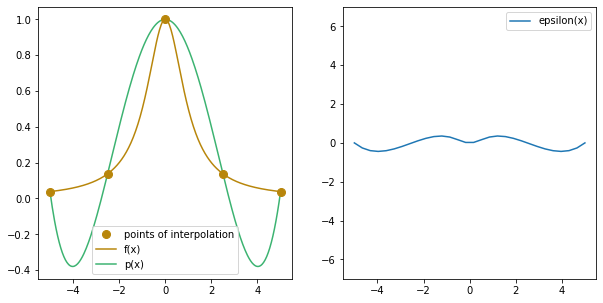

In [3]:
interpolate(f, np.linspace(start=-5, stop=5, num=5))

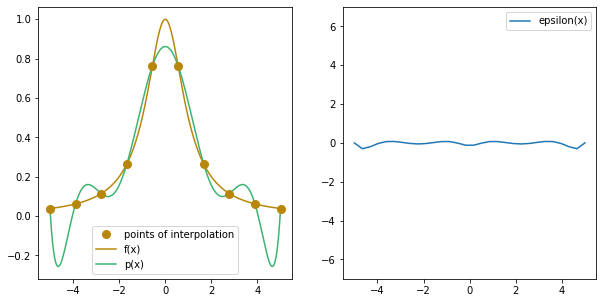

In [4]:
interpolate(f, np.linspace(start=-5, stop=5, num=10))

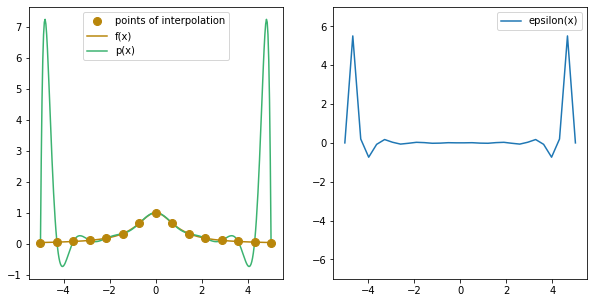

In [5]:
interpolate(f, np.linspace(start=-5, stop=5, num=15))

## 2. Wielomiany interpolujące
Dla danej funkcji i przedziału z poprzedniego zadania oraz n = 15 znajdź wielomian
interpolacyjny w węzłach Czebyszewa, danych wzorem x<sub>k</sub> = 0.5(a+b)+ 0.5(b−a)cos((2k−1)/(2n)π), gdzie k = 1, .., n, a a, b są odpowiednio początkiem i końcem przedziału interpolacji.

Narysuj wykres wynikowego wielomianu. W jaki sposób zmienił się błąd interpolacji w porównaniu do wyników z poprzedniego zadania? Czemu tak się stało?

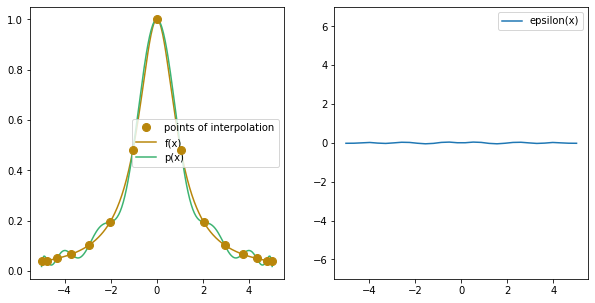

In [6]:
n = 15
xs = np.array([0.5*(5-(-5))*cos((2*k - 1)/(2*n)*np.pi) for k in range(1, n+1)])
interpolate(f, xs)

<p style="text-align: justify">Zmieniając punkty interpolacji na węzly Czebyszewa błąd dla n=15 znacznie zmalał. Nie obserwujemy obszarów, w których błąd jest nieproporcjonalnie duży, tak jak to było dla węzów równoodległych. Wynika to z tego, iż stosując punkty specjalnie dobrane, efekt Rungego nie występuje lub występuje w minimalnym stopniu. </p>

## 3. Interpolacja krzywych funkcjami sklejanymi

Mając daną elipsę w postaci parametrycznej <br>
> $x = a cos(t)$ <br>
> $y = b sin(t)$ <br>
  
gdzie $t ∈ [0, 2π]$ wykonaj jej interpolację sześciennymi funkcjami sklejanymi dla 10 równoodległych wartości $t_i$. Interpolację wykonaj osobno dla zbiorów punktów $(t_i, x_i)$ oraz $(t_i, y_i)$, a następnie narysuj przybliżenie powyższej elipsy używając wyznaczonych funkcji
dla 30 punktów.

In [7]:
n = 10
a = 2
b = 3

x = lambda t: a * cos(t)
y = lambda t: b * sin(t)

In [8]:
h = 2*np.pi/(n-1)

In [9]:
ts = np.linspace(start=0, stop=2*np.pi, num=n)

In [10]:
apply = lambda f, x: np.array(list(map(f, x)))

### metoda I

W pierwszym podejściu do rozwiązania problemu ułożyłem układ równań 3(n-1) równań, 3(n-1) niewiadomych.
Niewiadomymi są współczynniki przy czynniku $(x-x_i)$ w odpowiedniej potędze we wzorze na sześcienną funkcję interpolującą. Wyraz wolny łatwo można wyznaczyć znając wartości funkcji w węzłach. Wystarczyło znaleźć współczynniki $b_i, c_i, d_i$. Aby równań było wystarczająco dużo, aby rozwiązać układ, potrzeba była skorzystania z warunków brzegowych. W powyższym przykładzie funkcje x(t) i y(t) są periodyczne, dzięki czemu przyjąłem że wartości pochodnych w punkcie $x_0$ i $x_n$ są jednakowe.

In [11]:
def coefficients(f):
    '''zwraca współczynniki b_i, c_i, d_i dla interpolacji funkcji f i węzłów ts'''
    A = np.zeros(shape=(3*(n-1), 3*(n-1)))
    B = np.zeros(3*(n-1))

    # równość wartości funkcji w miejscach łączenia
    for i in range(n-1):
        A[i][i] = h
        A[i][i+ n-1] = h**2
        A[i][i+ 2*(n-1)] = h**3
        B[i] = f(ts[i+1]) - f(ts[i]) if i != n - 2 else f(ts[0]) - f(ts[i])
    
    # równość pierwszych pochodnych
    for i in range(n - 1):
        A[n-1 + i][i] = ts[i+1] if i != n - 2 else ts[0]
        A[n-1 + i][i + n-1] = 2*h
        A[n-1 + i][i + 2*(n-1)] = 3*h**2
        if i + 1 < n - 1:
            A[n-1 + i][i+1] = -ts[i+1]
        else:
            A[n-1 + i][0] = -ts[0]
        B[n-1+i] = 0

    # równość drugich pochodnych
    for i in range(n - 1):
        A[2*(n-1) + i][i] = 1
        A[2*(n-1) + i][i + (n-1)] = 2
        A[2*(n-1) + i][i + 2*(n-1)] = 6*h
        if i+1 < n-1: 
            A[2*(n-1) + i][i+1] = -1
            A[2*(n-1) + i][i+1 + (n-1)] = -2
        else:
            A[2*(n-1) + i][0] = -1
            A[2*(n-1) + i][0 + (n-1)] = -2
            
        B[2*(n-1)+i] = 0
    
    bcd = np.linalg.solve(A, B)
    return bcd[:n-1], bcd[n-1:2*(n-1)], bcd[2*(n-1):]

In [12]:
coefficents_x = coefficients(x)
coefficents_y = coefficients(y)

In [13]:
def s_1(t, f):
    '''sklejana funkcja interpolująca'''
    i = floor(t/h)
    if i == len(ts)-1: i -= 1
        
    b, c, d = coefficents_x if f == x else coefficents_y
    
    return f(ts[i]) + b[i] * (t - ts[i]) + c[i] * (t - ts[i])**2 + d[i] * (t - ts[i])**3

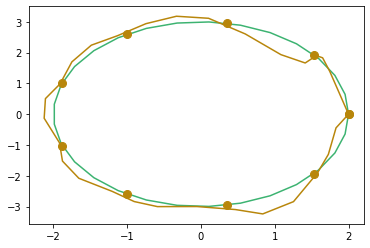

In [14]:
def draw_interpolation_1():
    fig, ax = plt.subplots(1,1)

    ax.plot(apply(x, ts), apply(y, ts), marker='o', linestyle='', zorder=10, color = 'darkgoldenrod', markersize=8)
    t_axis = np.linspace(0, 2*np.pi, 30)

    ax.plot(apply(x, t_axis), apply(y, t_axis), color="mediumseagreen")
    ax.plot(apply(lambda a: s_1(a, x), t_axis), apply(lambda a: s_1(a, y), t_axis), color="darkgoldenrod")

draw_interpolation_1()

Otrzymany rezultat różni się nieco od oczekiwanego, co może wynikać z błędów precyzji przy licznych operacjach podczas rozwiązywania układu równań.

### metoda II

Zaimplementowałem także inny sposób na znalezienie funkcji interpolującej, który był prezentowany na wykładzie. Aby w pełni skorzystać z wyprowadzonych zależności, przyjąłem takie same warunki brzegowe, to jest to, iż jeden wielomian przechodzi przez pierwsze 4 i jeden przez ostatnie 4 punkty.

In [15]:
def delta(f, i, deg):
    '''liczy wartość odpowiednich ilorazów różnicowych'''
    if deg == 1:
        return (f(ts[i+1])-f(ts[i]))/h
    return (delta(f, i+1, deg-1) - delta(f, i, deg-1))/(deg*h)

In [16]:
def find_sigmas(f):
    '''zwraca wartości sigma czyli przeskalowane wartości drugiej pochodnej w węzłach'''
    A = np.zeros(shape=(n, n))
    B = np.zeros(n)

    for i in range(1, n-1):
        A[i][i-1] = h
        A[i][i] = 2*h
        A[i][i+1] = h
        B[i] = delta(f, i, 1) - delta(f, i-1, 1)

    A[0][0] = -h
    A[0][1] = h
    A[n-1][n-1] = -h
    A[n-1][n-2] = h

    B[0] = h**2*delta(f, 0, 3)
    B[n-1] = -h**2*delta(f, n-4, 3)

    sigmas = np.linalg.solve(A, B)
    return sigmas

In [17]:
sigmas_x = find_sigmas(x)
sigmas_y = find_sigmas(y)

In [18]:
def s_2(t, f):
    sigmas = sigmas_x if f == x else sigmas_y
    i = floor(t/h)
    nxt = i+1 if i != len(ts)-1 else 0
    
    y_i = f(ts[i])
    b_i = (f(ts[nxt]) - f(ts[i]))/h - h*(sigmas[nxt] + 2*sigmas[i])
    c_i = 3*sigmas[i]
    d_i = (sigmas[nxt] - sigmas[i])/h
    
    return y_i + b_i*(t - ts[i]) + c_i * (t - ts[i])**2 + d_i*(t - ts[i])**3

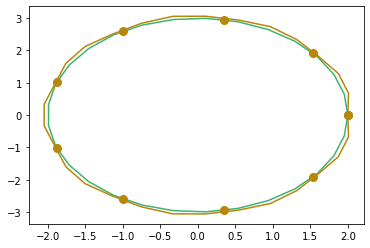

In [19]:
def draw_interpolation_2():
    fig, ax = plt.subplots(1, 1)

    ax.plot(apply(x, ts), apply(y, ts), marker='o', linestyle='', zorder=10, color = 'darkgoldenrod', markersize=8)
    t_axis = np.linspace(0, 2*np.pi, 30)

    ax.plot(apply(x, t_axis), apply(y, t_axis), color="mediumseagreen")
    ax.plot(apply(lambda a: s_2(a, x), t_axis), apply(lambda a: s_2(a, y), t_axis), color="darkgoldenrod")

draw_interpolation_2()

Druga metoda, oprócz bycia wydajniejszą obliczeniowo, okazała się także bardziej skuteczna

## Wnioski

* Już dla 15 równoodległych punktów efekt Rungego jest bardzo zauważalny, występuje głównie na końcach przedziału.
* Dobranie węzłów będących pierwiastkami wielomianu Czebyszewa wystarczyło do poradzenia sobie z tymże efektem.
* Funkcje sklejane prowadzą do otrzymania dużo mniejszych błędów niż poprzednie metody.

M. Hawryluk 24.03.2021